In [ ]:
# Import the analyze_streaks function from our shared module
from streak_analyzer import analyze_streaks

# Import matplotlib for displaying plots in notebook
import matplotlib.pyplot as plt

print("✅ Successfully imported analyze_streaks function from streak_analyzer.py")
print("✅ Ready to run streak analysis!")


✅ Successfully imported analyze_streaks function from qqq_multi_day_pattern.py
✅ Ready to run streak analysis!


In [ ]:
# ⚠️ IMPORTANT: Update the database path below to match your system
database_file_path = '/Users/akundu/programs/python/pythonv3/pub-py-scripts/stocks/data/stock_data.db'

# Stock ticker symbol to analyze
ticker_symbol = 'QQQ'

# Percentage move threshold to trigger streak analysis (e.g., 0.01 = 1%)
trigger_threshold = 0.01

# Number of days to look back from most recent date
# Set to None to analyze all available data
lookback_days = 365  # Last 365 days

# Enable performance analysis (shows market performance after streaks end)
analyze_performance = True  # Set to False to skip performance analysis

print(f"Configuration loaded:")
print(f"  📊 Database: {database_file_path}")
print(f"  🎯 Ticker: {ticker_symbol}")
print(f"  📈 Threshold: {trigger_threshold*100:.1f}%")
print(f"  📅 Lookback: {lookback_days} days" if lookback_days else "  📅 Lookback: All available data")
print(f"  🔍 Performance Analysis: {'Enabled' if analyze_performance else 'Disabled'}")


Configuration loaded:
  📊 Database: /Users/akundu/programs/python/pythonv3/pub-py-scripts/stocks/data/stock_data.db
  🎯 Ticker: QQQ
  📈 Threshold: 1.0%
  📅 Lookback: 365 days


🔍 Starting streak analysis...
Analyzing data from 2024-07-02 to 2025-07-02 (365 days lookback)
--- Streak Analysis for QQQ ---
Found 53 spike events and 45 dip events

### Histogram for Consecutive UP Days After a >1% SPIKE ###
Streak Length | Number of Occurrences
-------------------------------------
0             | 26
1             | 9
2             | 7
3             | 5
4             | 4
5             | 1
7             | 1

### Histogram for Consecutive DOWN Days After a >1% DIP ###
Streak Length | Number of Occurrences
-------------------------------------
0             | 27
1             | 10
2             | 6
3             | 2

📊 NOTEBOOK-SPECIFIC DATA DISPLAY


/Volumes/RAID1 NVME SSD 2TB/akundu_programs_dev/programs/python/pythonv3/pub-py-scripts/stocks/scripts/tmp/streak_analyzer.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spike_counts.index, y=spike_counts.values, ax=axes[0], palette='Greens_d')
/Volumes/RAID1 NVME SSD 2TB/akundu_programs_dev/programs/python/pythonv3/pub-py-scripts/stocks/scripts/tmp/streak_analyzer.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dip_counts.index, y=dip_counts.values, ax=axes[1], palette='Reds_d')


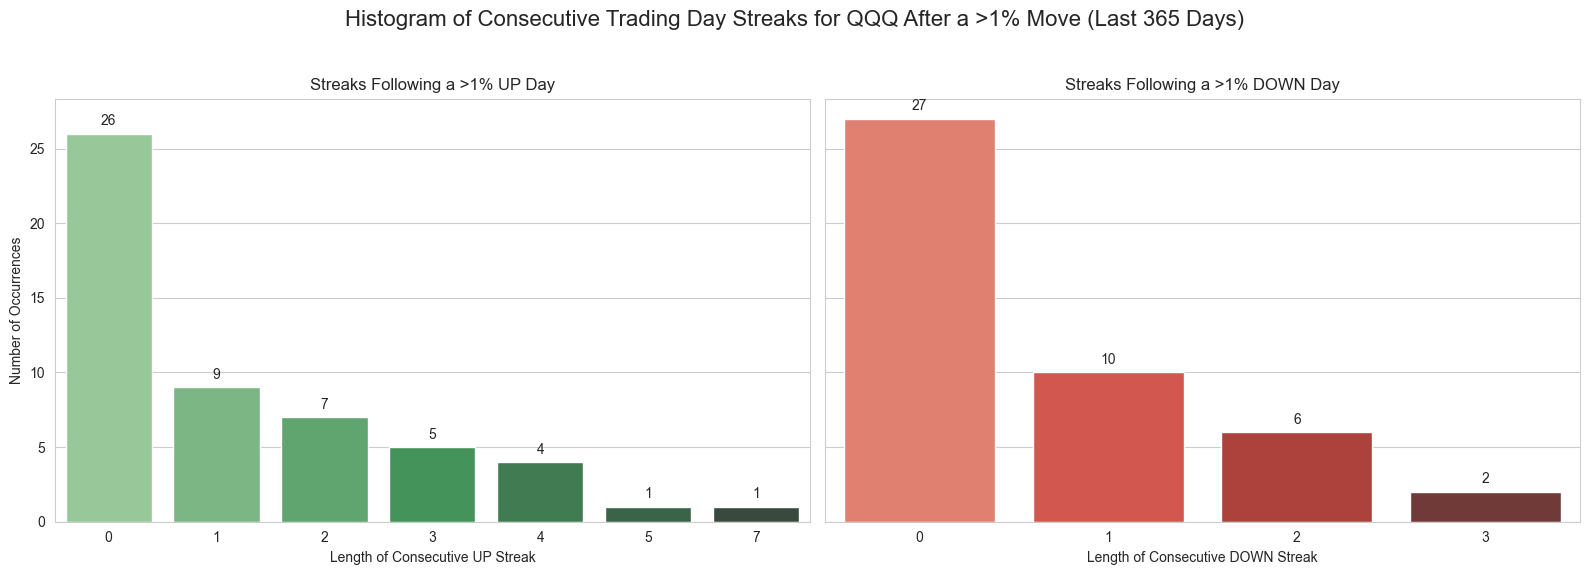

In [ ]:
# Run the streak analysis
print("🔍 Starting streak analysis...")
print("="*50)

# Call the analyze_streaks function with return_data=True to get results back
spike_df, dip_df, plot_fig = analyze_streaks(
    db_path=database_file_path,
    ticker=ticker_symbol,
    threshold=trigger_threshold,
    lookback_days=lookback_days,
    return_data=True,  # ✅ This is KEY - tells function to return data for notebook use
    analyze_performance=analyze_performance  # ✅ NEW - enables performance analysis
)

# Check if analysis was successful
if spike_df is not None and dip_df is not None:
    print("\n" + "="*50)
    print("📊 NOTEBOOK-SPECIFIC DATA DISPLAY")
    print("="*50)
else:
    print("❌ Analysis failed - check your configuration and database path")


In [4]:
# Display results if analysis was successful
if spike_df is not None and dip_df is not None:
    
    print(f"📈 SPIKE EVENTS - Consecutive UP days after >{trigger_threshold*100:.1f}% UP move:")
    display(spike_df)
    
    print(f"\n📉 DIP EVENTS - Consecutive DOWN days after >{trigger_threshold*100:.1f}% DOWN move:")
    display(dip_df)
    
    # Display the plot
    print(f"\n📊 Visual Analysis:")
    plt.show()
    
    # Save the plot
    plot_filename = f'{ticker_symbol}_streak_histograms_notebook.png'
    plot_fig.savefig(plot_filename, dpi=300, bbox_inches='tight')
    print(f"\n💾 Plot saved as: {plot_filename}")
    
    # Summary statistics
    print(f"\n📋 SUMMARY:")
    print(f"   • Total spike events: {len(spike_df) if not spike_df.empty else 0}")
    print(f"   • Total dip events: {len(dip_df) if not dip_df.empty else 0}")
    print(f"   • Analysis period: {lookback_days} days" if lookback_days else "   • Analysis period: All available data")
    
else:
    print("❌ No results to display. Please check your configuration and run the analysis cell again.")


📈 SPIKE EVENTS - Consecutive UP days after >1.0% UP move:


Streak Length  Number of Occurrences
0              0                     26
1              1                      9
2              2                      7
3              3                      5
4              4                      4
5              5                      1
6              7                      1


📉 DIP EVENTS - Consecutive DOWN days after >1.0% DOWN move:


Streak Length  Number of Occurrences
0              0                     27
1              1                     10
2              2                      6
3              3                      2


📊 Visual Analysis:

💾 Plot saved as: QQQ_streak_histograms_notebook.png

📋 SUMMARY:
   • Total spike events: 7
   • Total dip events: 4
   • Analysis period: 365 days
